<a href="https://colab.research.google.com/github/cbonnin88/Soundstream/blob/main/social_media_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
social_media_data = {
    "text": [
        "I love Soundstream !!!, definately recommend",
        "Horrible app, will be deleting",
        "It's okay",
        "Perfect app, amazing choice of music",
        "Not satisfied with the library choice",
        "The premium is definately worth it"
    ],
    'sentiment':[
        'Positive',
        'Negative',
        'Neutral',
        'Positive',
        'Negative',
        'Positive'
    ]
}

In [16]:
df_sentiment = pd.DataFrame(social_media_data)

In [17]:
# feature extraction
tfid_vectorizer = TfidfVectorizer()
x = tfid_vectorizer.fit_transform(df_sentiment['text'])

In [19]:
# splitting the data into training and testing sets
x_train, x_test,y_train,y_test = train_test_split(x,df_sentiment['sentiment'],test_size=0.2,random_state=42)

In [20]:
# Creating the model
model = LogisticRegression()

In [21]:
# Training the model
model.fit(x_train,y_train)

LogisticRegression()

In [22]:
# Evaluate the model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)

In [23]:
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,y_pred))

Accuracy: 0.5
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

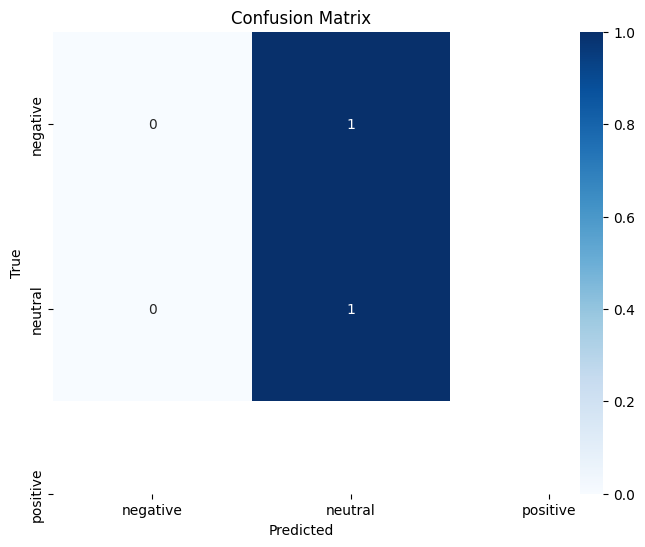

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['negative','neutral','positive'],
            yticklabels=['negative',"neutral",'positive',]
            )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-29-7467d45d32f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentimental_distribution.index,


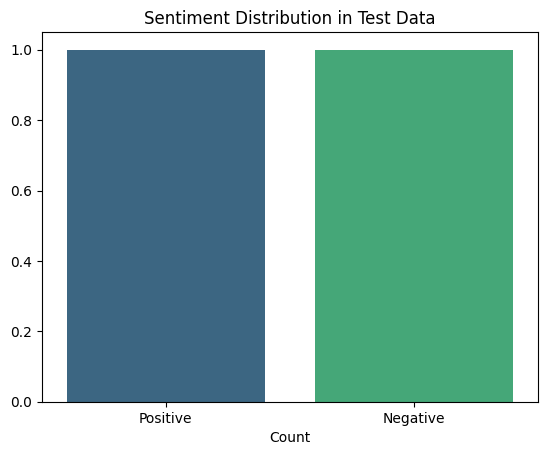

In [29]:
# Sentiment Distribution Bar Chart
sentimental_distribution = y_test.value_counts()
sns.barplot(x=sentimental_distribution.index,
          y=sentimental_distribution.values,
          palette='viridis')

plt.xlabel('Count')
plt.title('Sentiment Distribution in Test Data')
plt.show()